In [1]:
import numpy as np
from tensorflow import keras
import utils

In [2]:
(x_train, y_train), (x_val, y_val), (x_test, y_test) = utils.load_time_series_data()

x_train = np.expand_dims(x_train, -1)
x_val = np.expand_dims(x_val, -1)
x_test = np.expand_dims(x_test, -1)

print(f"x_train.shape = {x_train.shape}, y_train.shape = {y_train.shape}")
print(f"x_val.shape = {x_val.shape}, y_val.shape = {y_val.shape}")
print(f"x_test.shape = {x_test.shape}, y_test.shape = {y_test.shape}")

x_train.shape = (7000, 50, 1), y_train.shape = (7000,)
x_val.shape = (2000, 50, 1), y_val.shape = (2000,)
x_test.shape = (1000, 50, 1), y_test.shape = (1000,)


In [3]:
utils.reset_session()

model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])

optimizer = keras.optimizers.Adam(lr=1e-2)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
219/219 [==============================] - 1s 5ms/step - loss: 0.0654 - mae: 0.2036 - val_loss: 0.0291 - val_mae: 0.1416
Epoch 2/10
219/219 [==============================] - 1s 4ms/step - loss: 0.0225 - mae: 0.1229 - val_loss: 0.0178 - val_mae: 0.1103
Epoch 3/10
219/219 [==============================] - 1s 4ms/step - loss: 0.0159 - mae: 0.1031 - val_loss: 0.0137 - val_mae: 0.0969
Epoch 4/10
219/219 [==============================] - 1s 4ms/step - loss: 0.0131 - mae: 0.0938 - val_loss: 0.0119 - val_mae: 0.0902
Epoch 5/10
219/219 [==============================] - 1s 4ms/step - loss: 0.0119 - mae: 0.0893 - val_loss: 0.0112 - val_mae: 0.0870
Epoch 6/10
219/219 [==============================] - 1s 4ms/step - loss: 0.0115 - mae: 0.0875 - val_loss: 0.0109 - val_mae: 0.0856
Epoch 7/10
219/219 [==============================] - 1s 4ms/step - loss: 0.0114 - mae: 0.0869 - val_loss: 0.0109 - val_mae: 0.0854
Epoch 8/10
219/219 [==============================] - 1s 5ms/step - loss: 0.

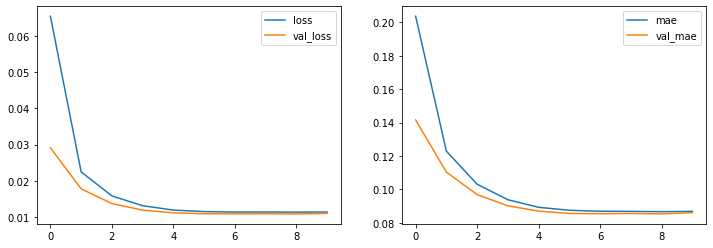

In [4]:
utils.plot_history(history)

In [5]:
model.evaluate(x_val, y_val)

63/63 [==============================] - 0s 2ms/step - loss: 0.0110 - mae: 0.0861


[0.011009314097464085, 0.08608216792345047]

In [6]:
y_pred = model.predict(x_val)
utils.evaluate(y_val, y_pred[:, 0])

mse = 0.01100931, mae = 0.08608217


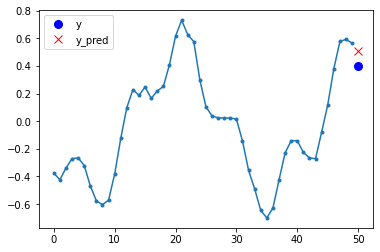

In [7]:
utils.plot_series(x_val[0], y_val[0], y_pred[0])